In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x=1): #待优化最小函数
    return np.random.randn(100000)[x]

def PDE(DE,t,k=1):
    return np.exp((DE)/(k*t))

def DE_function(new,old):
    return new - old

def jump(DE,T,k=1):
    return PDE(DE,T,k) > np.random.rand() and 0 or 1# 

def simulated_annealing(parameter={"T":1,"T_min":0,"r":0.0001,"expr":0,"jump_max":np.inf}):
    path , funcpath = [] ,[]

    T = parameter["T"] #系统温度，初时应在高温
    T_min = parameter["T_min"] #最小温度值
    r = parameter["r"] #降温速率
    counter = 0
    expr = parameter["expr"] #假设初解
    jump_max = parameter["jump_max"] # 最大冷却值
    jump_counter = 0
    while T > T_min:
        counter += 1
        new_expr = f() #新解
        funcpath.append(new_expr)
        DE = new_expr - expr 
        if DE <= 0:
            expr = new_expr
            jump_counter = 0
        elif DE > 0:
            expr = expr
            if jump(DE,T):
                T *= r
                jump_counter += 1  
                if jump_counter > jump_max:
                    print("最大回炉冷却次数:",jump_counter)
                    return expr,path,funcpath
        path.append(expr)
        print("{}{}{}{}{}{}{}{}".format('系统温度:',T,' 新状态:',expr,' 迭代轮次:',counter,' DE:',DE))
        

    return expr,path,funcpath
expr,path,funcpath = simulated_annealing(parameter={"T":1,"T_min":0,"r":0.11,"expr":0,"jump_max":1000})

统温度:1.138893581803495e-94 新状态:-2.354046303320602 迭代轮次:104 DE:3.3591038416907604
系统温度:1.2527829399838445e-95 新状态:-2.354046303320602 迭代轮次:105 DE:2.496703147520473
系统温度:1.378061233982229e-96 新状态:-2.354046303320602 迭代轮次:106 DE:3.878255607974592
系统温度:1.5158673573804518e-97 新状态:-2.354046303320602 迭代轮次:107 DE:3.8021085760078384
系统温度:1.667454093118497e-98 新状态:-2.354046303320602 迭代轮次:108 DE:0.8374865900331077
系统温度:1.8341995024303467e-99 新状态:-2.354046303320602 迭代轮次:109 DE:2.3869576307032094
系统温度:2.0176194526733814e-100 新状态:-2.354046303320602 迭代轮次:110 DE:3.8862924973102526
系统温度:2.2193813979407196e-101 新状态:-2.354046303320602 迭代轮次:111 DE:1.811158042508739
系统温度:2.4413195377347914e-102 新状态:-2.354046303320602 迭代轮次:112 DE:0.8874644944221812
系统温度:2.6854514915082703e-103 新状态:-2.354046303320602 迭代轮次:113 DE:2.0396696352524275
系统温度:2.953996640659097e-104 新状态:-2.354046303320602 迭代轮次:114 DE:2.5261209563570883
系统温度:3.2493963047250068e-105 新状态:-2.354046303320602 迭代轮次:115 DE:1.8569269875858647
系统温度:3.57433593519

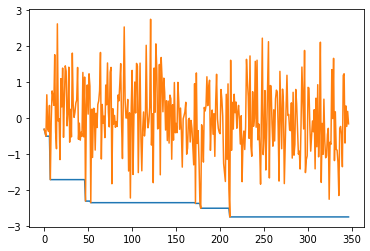

In [9]:
plt.plot(path)
plt.plot(funcpath)